In [ ]:
#Sleep Stage classification of EEG sleep data from Physionet

#importing library
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer 
import mne 



#Sleep Stage Classification of EEG Data from physionet.org 
## Accessing the Sleep EEG data files l have downloaded from physionet.org

In [ ]:

folder_path = r"C:\Users\GULLYHUB\Desktop\sleep psg"
edf_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        file_path= os.path.join(folder_path, filename)
        edf_files.append(file_path)
        print(f'found edf file:{file_path}')


found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4001E0-PSG.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4001EC-Hypnogram.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4002E0-PSG.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4002EC-Hypnogram.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4011E0-PSG.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4011EH-Hypnogram.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4012E0-PSG.edf
found edf file:C:\Users\GULLYHUB\Desktop\sleep psg\SC4012EC-Hypnogram.edf


In [ ]:
all_raw_data = []
for  edf_file in edf_files:
    try:
        raw=mne.io.read_raw_edf(edf_file, preload=True)
        all_raw_data.append(raw)
        print(f'successfully load data:{filename}')
    except Exception as e:
        print(f'Error loading {edf_file}:{e}') 

Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_edf(edf_file, preload=True)


successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4001EC-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2053  =      0.000 ...     1.000 secs...
successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Omitted 153 annotation(s) that were outside data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\

successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4002EC-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2033  =      0.000 ...     1.000 secs...
successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8405999  =      0.000 ... 84059.990 secs...


C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Omitted 151 annotation(s) that were outside data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\

successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4011EH-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1691  =      0.000 ...     0.999 secs...
successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4012E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8549999  =      0.000 ... 85499.990 secs...


C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Omitted 125 annotation(s) that were outside data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\

successfully load data:SC4012EC-Hypnogram.edf
Extracting EDF parameters from C:\Users\GULLYHUB\Desktop\sleep psg\SC4012EC-Hypnogram.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2284  =      0.000 ...     1.000 secs...
successfully load data:SC4012EC-Hypnogram.edf


C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Header information is incorrect for record length. Default record length set to 1.
It is possible that this file only contains annotations and no signals. In that case, please use mne.read_annotations() to load these annotations.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Omitted 170 annotation(s) that were outside data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)
C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_2760\803226281.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf(edf_file, preload=True)


In [ ]:
 Alice_raw = all_raw_data[0]
 Kofi_raw = all_raw_data[1]

 print(f'first raw :{Alice_raw}')
 print(f'second raw :{ Kofi_raw}')

first raw :<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>
second raw :<RawEDF | SC4001EC-Hypnogram.edf, 0 x 2054 (1.0 s), ~5 KiB, data loaded>


In [ ]:
folder_path = r"C:\Users\GULLYHUB\Desktop\sleep psg"
all_files = os.listdir(folder_path)
edf_files=[os.path.join(folder_path, f) for f in all_files if f.lower().endswith('.edf')]
Alice_raw_train = None 

Alice_file_Path = edf_files[0]

Alice_raw_train = mne.io.read_raw_edf(Alice_file_Path,
    stim_channel='event maker',
    infer_types=True,
    preload=True,
    verbose="error", # ignore issues with strong filter setting
)
print('successfully loaded Alice first edf from :{Alice_file_path}')


successfully loaded Alice first edf from :{Alice_file_path}


In [ ]:
annot_train= mne.read_annotations(edf_files[1])

Alice_raw_train.set_annotations(annot_train, emit_warning=False)
        

<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

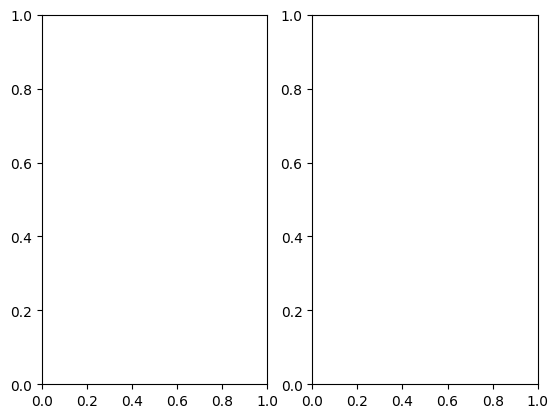

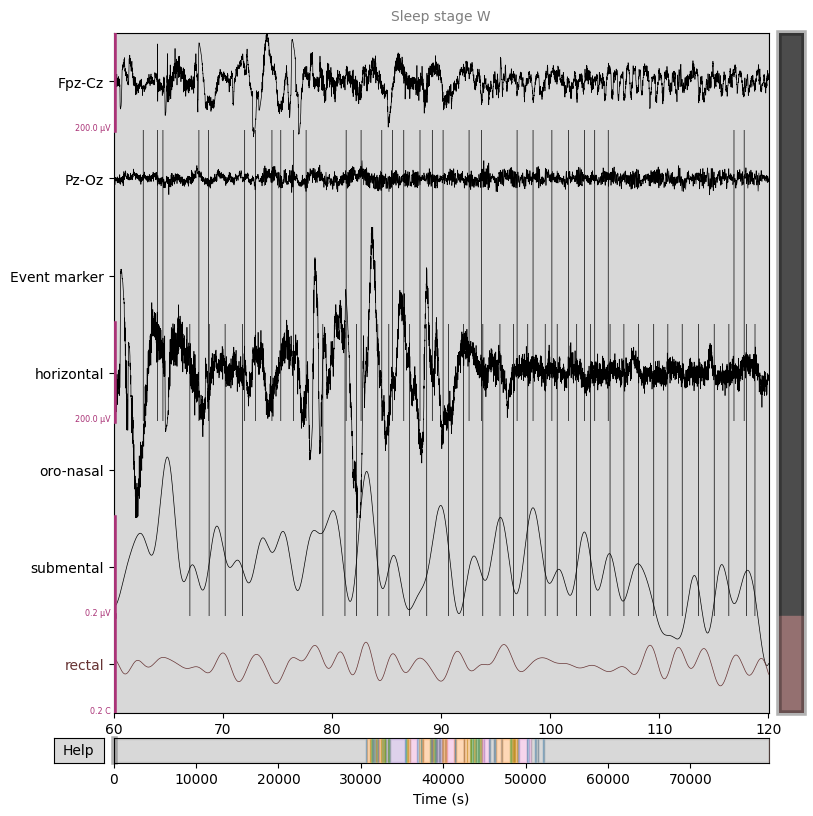

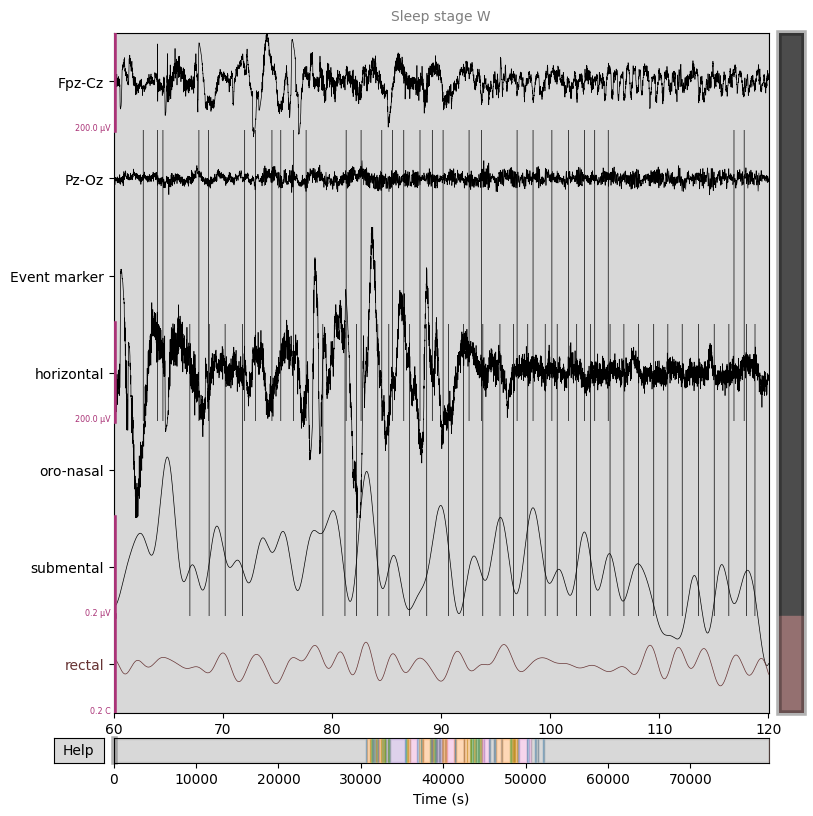

In [ ]:
# plot some data
Alice_raw_train.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, eog=1e-4, emg=1e-7, misc=1e-1),
)      

In [ ]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

In [ ]:
annot_train.crop(annot_train[1]["onset"]-30 * 60, annot_train[-2]["onset"] + 30 * 60)
Alice_raw_train.set_annotations(annot_train, emit_warning=False)

<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

In [ ]:
events_train, _ = mne.events_from_annotations(
    Alice_raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.0
)

Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


In [ ]:
# create a new event_id that unifies stages 3 and 4
event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3/4": 4,
    "Sleep stage R": 5,
}

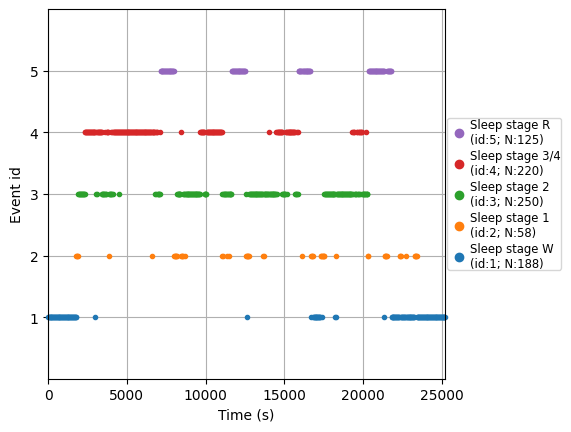

In [ ]:
# plot events
fig = mne.viz.plot_events(
    events_train,
    event_id=event_id,
    sfreq=Alice_raw_train.info["sfreq"],
    first_samp=events_train[0, 0],
)

# keep the color-code for further plotting
stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [ ]:
# Create Epochs from the data based on the events found in the annotations
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

tmax = 30.0 - 1.0 / Alice_raw_train.info["sfreq"]  # tmax in included

epochs_train = mne.Epochs(
    raw=Alice_raw_train,
    events=events_train,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)
del Alice_raw_train

print(epochs_train)


Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
<Epochs | 841 events (good & bad), 0 – 29.99 s (baseline off), ~11 KiB, data not loaded,
 'Sleep stage W': 188
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125>


In [ ]:
folder_path = r"C:\Users\GULLYHUB\Desktop\sleep psg"
all_files = os.listdir(folder_path)
edf_files=[os.path.join(folder_path, f) for f in all_files if f.lower().endswith('.edf')]
Kofi_raw_train = None 

Kofi_file_Path = edf_files[2]

Kofi_raw_train = mne.io.read_raw_edf(Alice_file_Path,
    stim_channel='event maker',
    infer_types=True,
    preload=True,
    verbose="error", # ignore issues with strong filter setting
)
print('successfully loaded Kofi first edf from :{Kofi_file_path}')


successfully loaded Kofi first edf from :{Kofi_file_path}


In [ ]:
annot_train= mne.read_annotations(edf_files[3])

Kofi_raw_train.set_annotations(annot_train, emit_warning=False)
        

<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

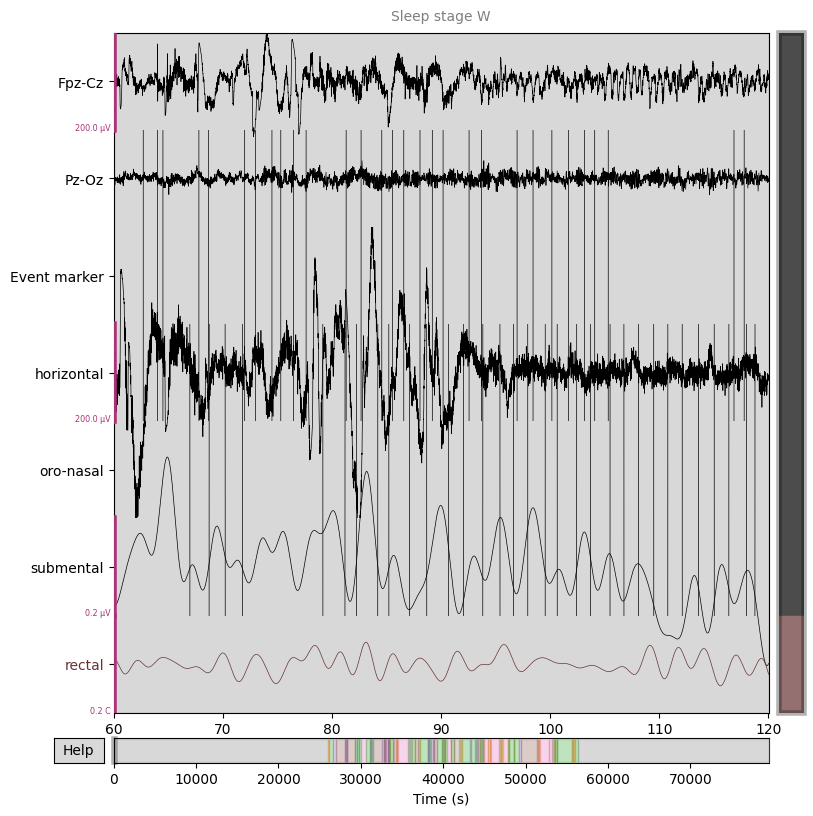

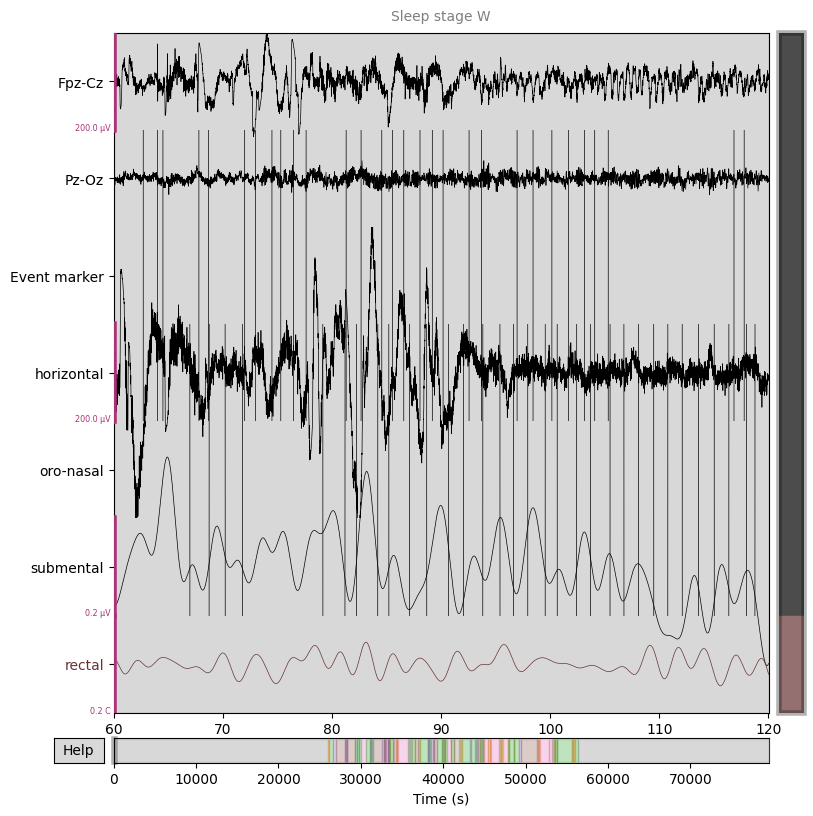

In [ ]:
# plot some data
Kofi_raw_train.plot(
    start=60,
    duration=60,
    scalings=dict(eeg=1e-4, eog=1e-4, emg=1e-7, misc=1e-1),
)      

In [ ]:
annotation_desc_2_event_id = {
    "Sleep stage W": 1,
    "Sleep stage 1": 2,
    "Sleep stage 2": 3,
    "Sleep stage 3": 4,
    "Sleep stage 4": 4,
    "Sleep stage R": 5,
}

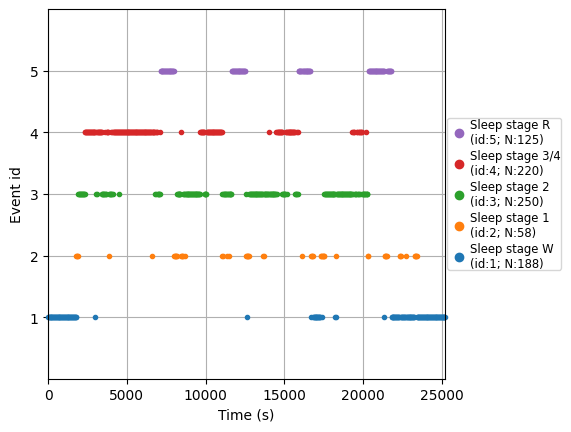

In [ ]:
# plot events
fig = mne.viz.plot_events(
    events_train,
    event_id=event_id,
    sfreq=Kofi_raw_train.info["sfreq"],
    first_samp=events_train[0, 0],
)

# keep the color-code for further plotting
stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [ ]:
# Create Epochs from the data based on the events found in the annotations
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

tmax = 30.0 - 1.0 / Kofi_raw_train.info["sfreq"]  # tmax in included

epochs_test = mne.Epochs(
    raw=Kofi_raw_train,
    events=events_train,
    event_id=event_id,
    tmin=0.0,
    tmax=tmax,
    baseline=None,
)
del Kofi_raw_train

print(epochs_test)


Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
<Epochs | 841 events (good & bad), 0 – 29.99 s (baseline off), ~11 KiB, data not loaded,
 'Sleep stage W': 188
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125>


In [ ]:
##############################################################################
# Feature Engineering
# -------------------
#
# Observing the power spectral density (PSD) plot of the :term:`epochs` grouped
# by sleeping stage we can see that different sleep stages have different
# signatures. These signatures remain similar between Alice and Bob's data.
#
# The rest of this section we will create EEG features based on relative power
# in specific frequency bands to capture this difference between the sleep
# stages in our data.

# visualize Alice vs. Bob PSD by sleep stage.
fig, (ax1, ax2) = plt.subplots(ncols=2)

# iterate over the subjects
stages = sorted(event_id.keys())
for ax, title, epochs in zip([ax1, ax2], ["Alice", "Kofi"], [epochs_train, epochs_test]):
    for stage, color in zip(stages, stage_colors):
        spectrum = epochs[stage].compute_psd(fmin=0.1, fmax=20.0)
        spectrum.plot(
            ci=None,
            color=color,
            axes=ax,
            show=False,
            average=True,
            amplitude=False,
            spatial_colors=False,
            picks="data",
            exclude="bads",
        )
    ax.set(title=title, xlabel="Frequency (Hz)")
ax1.set(ylabel="µV²/Hz (dB)")
ax2.legend(ax2.lines[2::3], stages)


Using data from preloaded Raw for 58 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Using data from preloaded Raw for 250 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Using data from preloaded Raw for 220 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Using data from preloaded Raw for 125 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Using data fr

In [ ]:
# Design a scikit-learn transformer from a Python function
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# We will now create a function to extract EEG features based on relative power
# in specific frequency bands to be able to predict sleep stages from EEG
# signals.


def eeg_power_band(epochs):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 5 * n_channels]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {
        "delta": [0.5, 4.5],
        "theta": [4.5, 8.5],
        "alpha": [8.5, 11.5],
        "sigma": [11.5, 15.5],
        "beta": [15.5, 30],
    }

    spectrum = epochs.compute_psd(picks="eeg", fmin=0.5, fmax=30.0)
    psds, freqs = spectrum.get_data(return_freqs=True)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)


In [ ]:
##############################################################################
# Multiclass classification workflow using scikit-learn
# -----------------------------------------------------
#
# To answer the question of how well can we predict the sleep stages of Bob
# from Alice's data and avoid as much boilerplate code as possible, we will
# take advantage of two key features of sckit-learn: `Pipeline`_ , and
# `FunctionTransformer`_.
#
# Scikit-learn pipeline composes an estimator as a sequence of transforms
# and a final estimator, while the FunctionTransformer converts a python
# function in an estimator compatible object. In this manner we can create
# scikit-learn estimator that takes :class:`mne.Epochs` thanks to
# ``eeg_power_band`` function we just created.

pipe = make_pipeline(
    FunctionTransformer(eeg_power_band, validate=False),
    RandomForestClassifier(n_estimators=100, random_state=42),
)

# Train
y_train = epochs_train.events[:, 2]
pipe.fit(epochs_train, y_train)

# Test
y_pred = pipe.predict(epochs_test)

# Assess the results
y_test = epochs_test.events[:, 2]
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy score: {acc}")

##############################################################################
# In short, yes. We can predict Bob's sleeping stages based on Alice's data.
#
# Further analysis of the data
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# We can check the confusion matrix or the classification report.

print(confusion_matrix(y_test, y_pred))

Using data from preloaded Raw for 841 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 841 events and 3000 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Accuracy score: 1.0
[[188   0   0   0   0]
 [  0  58   0   0   0]
 [  0   0 250   0   0]
 [  0   0   0 220   0]
 [  0   0   0   0 125]]


In [ ]:
##############################################################################
#

print(classification_report(y_test, y_pred, target_names=event_id.keys()))



                 precision    recall  f1-score   support

  Sleep stage W       1.00      1.00      1.00       188
  Sleep stage 1       1.00      1.00      1.00        58
  Sleep stage 2       1.00      1.00      1.00       250
Sleep stage 3/4       1.00      1.00      1.00       220
  Sleep stage R       1.00      1.00      1.00       125

       accuracy                           1.00       841
      macro avg       1.00      1.00      1.00       841
   weighted avg       1.00      1.00      1.00       841

